In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import mlab
from scipy import signal
import h5py, time
import sys
import glob
sys.path.append('/home/analysis_user/New_trap_code/Tools/')
import BeadDataFile
from discharge_tools import *
from iminuit import Minuit, describe
from pprint import pprint # we use this to pretty print some stuff later
from tqdm import tqdm
from matplotlib.ticker import MaxNLocator


plt.rcParams["figure.figsize"] = (12,9)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

In [2]:
# specify the folder
#foldername = r'/data/new_trap/20200518/Bead2/Discharge/Discharge0519/'
foldername = r'/home/data_transfer/data_from_windows/20200525/Bead2/Discharge/Discharge0526/'


In [171]:
# set the drive and settings for the correlation
fdrive=71
nsamp = 50000
fsamp = 5000
sigamp = 1
tarr = np.arange(0, nsamp/fsamp, 1.0/fsamp)
sig = sigamp * np.sin(2.0 * np.pi * fdrive * tarr)


In [417]:
# load the files
files_discharge = load_dir(dirname=foldername, start_file=0, max_file=1500)

# get the in-phase response
corrs = [correlation(drive=sig, response=files.z2, fsamp=fsamp, fdrive=fdrive, filt=True, band_width=1) for files in files_discharge]
indices = [np.argmax(cc) for cc in corrs]
in_phase = []

#RtoQ=49 #this is the coefficient to convert response to charge. 
RtoQ=25 #this is the coefficient to convert response to charge. 
for cc in corrs:
    in_phase.append((cc[0]-95)/42)

338  files in folder
338  files loaded


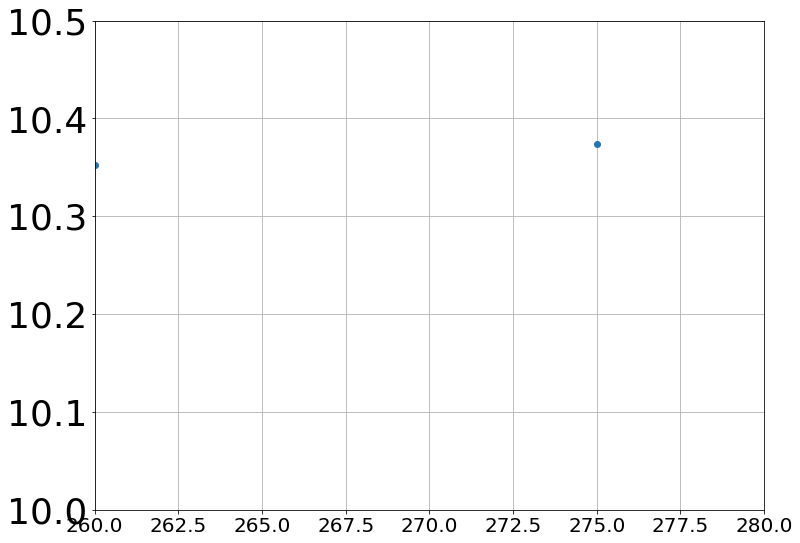

In [441]:
# plot the in-phase response
plt.plot(range(len(indices)),in_phase,linestyle="",marker="o")
plt.ylim(10,10.5)
plt.xlim(260,280)
plt.grid(True)
plt.show()